In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# Reflect Tables into SQLAlchemy ORM
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.metadata.create_all(engine)

In [6]:
# reflect the tables
Base.prepare(engine, reflect = True)

In [7]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [10]:
# Get a list of column names and types from measurement
measure_columns = inspector.get_columns('measurement')
for c in measure_columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Get a list of column names and types from station
station_columns = inspector.get_columns('station')
for c in station_columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [14]:
# Exploratory Precipitation Analysis
#Find the total dates
session.query(func.count(Measurement.date)).all()

[(19550,)]

In [15]:
# Find the earliest date
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01',)

In [16]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [ ]:
# Combine percpitation values across stations


In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# okay we don't need the other part of the greater than because the end date is inclusive and doesnt need to be called
last_year_dates = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    group_by(Measurement.date).\
    all()

#last_year_dates

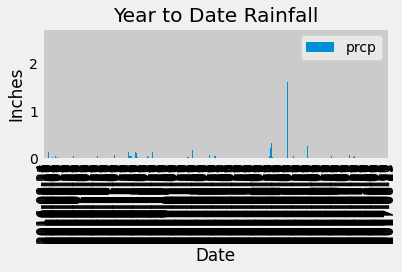

In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(last_year_dates, columns=['date', 'prcp'])
df.set_index('date', inplace=True)
df.plot.bar()
plt.title("Year to Date Rainfall")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.tight_layout()
plt.show()

In [9]:
# okay there isn't one for every day, its 365
for row in session.query(Measurement.id, Measurement.date, Measurement.prcp).limit(15).all():
    print(row)

NameError: name 'Measurement' is not defined

In [ ]:
# okay there isn't one for every day, its 330
# for row in session.query(Measurement.id, Measurement.date, Measurement.prcp).limit(365).all():
#     print(row)

In [ ]:
# one more time, with feeling
#for row in session.query(Measurement.id, Measurement.date, Measurement.prcp).limit(330).all():
#    print(row)

In [ ]:
#results = session.query(Measurement).\
#    filter(Measurement.date.like('2017-%')).\
#    count()
# results

In [ ]:
#from sqlalchemy import or_, and_
#twentyseven = session.query(Measurement).\
#    filter(or_(Measurement.date > '2016-08-23', Measurement.date <= '2017-08-23')).\
#    count()
#print(twentyseven)

In [ ]:
#for row in session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-08-23').all():
#    print(row)

In [ ]:
#records = session.query(Measurement.date, Measurement.prcp).\
#    filter(Measurement.date > '2016-12-31').\
#    all()
    
#for record in records:
#    print(record)

In [ ]:
# Filter out 'None' and replace with '0.0'
#update_nones = session.query(Measurement).update().where(Measurement.prcp == 'None').values(prcp='0.0')

In [ ]:
#update_none =session.query(Measurement).where(Measurement.prcp == 'None').all()

#print(update_none)

In [ ]:
#session.new

In [ ]:
#session.query(Measurement.prcp).all()

In [ ]:
# Starting from the most recent data point in the database. 

In [ ]:
# Calculate the date one year from the last date in data set.

In [ ]:
# Perform a query to retrieve the date and precipitation scores

In [ ]:
# Save the query results as a Pandas DataFrame and set the index to the date column

In [ ]:
# Sort the dataframe by date

In [ ]:
# Use Pandas Plotting with Matplotlib to plot the data

In [37]:
# Exploratory Station Analysis
# Design a query to calculate the total number stations in the dataset
station_number = session.query(Station.station).group_by(Station.station).all()
station_number

[('USC00511918',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00516128',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519281',),
 ('USC00519397',),
 ('USC00519523',)]

In [56]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
most_active = session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).\
        order_by(Measurement.station).\
        all()

most_active

[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [63]:
# List the stations and the counts in descending order.
descending = session.query(Measurement.station).order_by(Measurement.station.desc())
descending

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

In [ ]:
# Using the most active station id

In [ ]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [ ]:
# Close Session
session.close()